## REPORTE 8

camila durand 20200918

### LECTURA

El artículo mediante la discontinuidad de regresión examina los impactos en el largo plazo de la mita, un extenso sistema de trabajo forzoso minero vigente en Perú y Bolivia durante 1573 y 1812. Bajo este sistema más de 200 comunidades indígenas enviaban una séptima parte de su población masculina adulta a trabajar en las minas de plata de Potosí y de mercurio de Huancavelica.  El artículo analiza el efecto de la mita no sólo por las cantidad de personas que involucraba sino también a como la tenencia de la tierra y los bienes públicos intervinieron haciendo que se reduzca el consumo de los hogares y aumentara el retraso de crecimiento de los niños en las áreas afectadas. 

Al respecto de las fortalezas del artículo, el texto busca tener un análisis más preciso enfocándose en la población que  atraviesa la cordillera de los Andes en el sur del Perú, pues en estos segmentos la distribución étnica y otros observables son estadísticamente idénticos. Asimismo, complementa sus análisis mediante la revisión de literatura previa como la referente a la asociación positiva entre históricas haciendas y el desarrollo económico contemporáneo contrasta con la bien conocida hipótesis de que la desigualdad históricamente alta de la tierra es la causa fundamental del pobre desempeño del crecimiento a largo plazo de América Latina. También lo complementa usando indicadores sociales en el corto y largo plazo, con evidencia microeconómica que establecen una relación entre instituciones históricas y resultados económicos contemporáneos utilizando datos agregados. Por el lado de sus debilidades, es necesario reconocer que el mismo diseño de DR al necesitar que todos los factores relevantes varíen suavemente deja de lado ciertos factores discontinuos que pueden decirnos bastante acerca de los efectos de la mita en el largo plazo. Además al ser el primer estudio que usaba un enfoque de RD multidimensional y semiparamétrico puede haber dejado vacíos de ejecución en un espacio de esa dimensión.

Fuera de todo ello el artículo nos ayuda a entender un poco más sobre las relaciones de desigualdad presentadas en nuestro país a partir de un sistema como la mita y como pudo generar impactos tanto en el consumo como en el crecimiento de los niños. Lo cual representa un muy buen punto de partida para examinar y modelar una trayectoria de crecimiento de largo plazo en perú y en américa larina en general, al tener vivencias similares. Además de ello el mecanismo de regresión utilizado permite tener estimaciones más cercanas de los efectos de la mita al establecer que alrededor de un 25% de hogares reducen su consumo y que aumentan el retraso del crecimiento en los niños en alrededor de 6 puntos porcentuales. También este estudio permitió encontrar como la tenencia de la tierra, los bienes públicos y la participación en el mercado influyeron como canales a través de los cuales persisten sus impactos.

Finalmente es importante explorar cómo este estudio puede apoyar futuras investigaciones relacionadas a la evolución institucional y la investigaciones empíricas de cómo el estado puede dar forma a las interacciones económicas y las élites pueden usar la maquinaria estatal para obligar al trabajo o los ciudadanos pueden utilizar las garantías estatales para proteger su propiedad como Toro 2020. Y adicionalmente profundizar en como políticas públicas estatales pueden cambiar la situación de desigualdad generadas por estructuras históricas como lo ha hecho Stein en 2003.

Stein, R. H. (2003). Capital social, desarrollo y políticas públicas en la realidad latinoamericana.

Toro, J. C. (2020, 16 julio). El trabajo indígena en los Andes. La Mita | Julián Córdoba Toro. Iberoamérica Social. https://iberoamericasocial.com/el-trabajo-indigena-en-los-andes-la-mita/


### CODIGO

In [1]:
pip install linearmodels

In [2]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
from causalgraphicalmodels import CausalGraphicalModel
import os
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns

In [8]:
import matplotlib.pyplot as plt

#### INSTRUMENTAL VARIABLES

Para esta primera sección deben darle una leida a The Effect Book principalmente al capitulo de Instrumental Variables.
- Explique en qué consiste el supuesto de "Relevance"
- Explique en qué consiste el supuesto de "Validity

La **relevancia** hace referencia a que por lo menos una parte de nuestra variable dependiente X sea explicada por Z que sería nuestro instrumento. El supuesto de relevancia trata de buscar relación entre las variables instrumentales, y es según la fortaleza de la relación entre X y Z que se tendrá más confianza en la suposición de relevancia y menos saltará la estimación de una muestra a otra.

El supuesto de **validez** del instrumento es el más tenso y se refiere a que el instrumento en cuestión, Z, es una variable sin puertas traseras abiertas. Sin embargo, ello no significa que no se tenga la responsabilidad de cerrar todas las puertas traseras sino que trasladan esa responsabilidad  del tratamiento al instrumento y es más fácil cerrar las puertas traseras para el instrumento. Al respecto de este supuesto es donde hay más discusión hoy en día pues cada vez las personas son más difíciles de convencer sobre la validez.


#### PLOTEO DE HISTOGRAMAS

In [5]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

card = read_data("card.dta")
card.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


In [6]:
card_2 = (card
 .assign(college_in_county = np.select(
     [card["nearc4"].astype(bool)],
     ["1"],
      default="0"
 )))
card_2

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ,college_in_county
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539,0
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562,0
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975,0
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536,1
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,5218.0,0.0,1.0,12.0,25.0,8.0,12.0,82135.0,1.0,0.0,...,NaN,1.0,0.0,7.0,5.814130,49.0,-0.289775,6.103905,-1.505588,1
3006,5219.0,0.0,1.0,13.0,34.0,NaN,NaN,88765.0,1.0,0.0,...,NaN,1.0,1.0,15.0,6.175867,225.0,-0.137418,6.313285,2.214089,1
3007,5220.0,0.0,1.0,12.0,24.0,11.0,NaN,89271.0,0.0,0.0,...,109.0,1.0,0.0,6.0,6.214608,36.0,0.135805,6.078803,-1.907211,1
3008,5221.0,0.0,1.0,12.0,31.0,NaN,NaN,110376.0,1.0,0.0,...,107.0,1.0,1.0,13.0,6.569481,169.0,0.408375,6.161106,0.868737,1


Tomando en cuenta que la variable nearc4 representa si existe un college en el county debe realizar los siguientes ploteos de histogramas.

Grafique dos histogramas para la variable años de educación educ para cuando nearc4 == 1, y cuando nearc4 == 0. Compare y describa los patrones que encuentra.


<Figure size 1008x720 with 0 Axes>

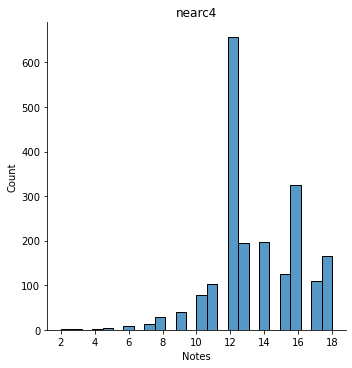

In [9]:
plt.figure(figsize=(14,10))

nearc4=card.loc[card['nearc4']==1]
ax = sns.displot(nearc4,x="educ")

plt.title('nearc4')
plt.xlabel('Notes')
plt.ylabel('Count')
plt.show()

<Figure size 1008x720 with 0 Axes>

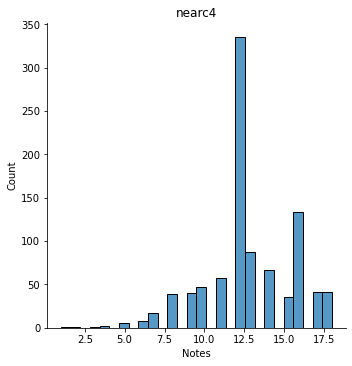

In [10]:
plt.figure(figsize=(14,10))

nearc4=card.loc[card['nearc4']==0]
ax = sns.displot(nearc4,x="educ")

plt.title('nearc4')
plt.xlabel('Notes')
plt.ylabel('Count')
plt.show()

**interpretacion**

hay una mayor cantidad de alumnos con unoversidad en su condado que de alumnos que no cuentan con ello. Y pese a que hat multiples similitudes en la distribucion de las barras hay variaciones relevantes alredore del 12.5. Ello puede significar que en el grupo de tratamiento es más probable llegar a los años finales de educación universitaria, en comparación con el grupo de control, aunque no hay nada definitivo debido a al gran similitud entre ambos histogramas

Grafique dos histogramas para la variable años del logaritmos de los ingresos lwage para cuando nearc4 == 1, y cuando nearc4 == 0. Compare y describa los patrones que encuentra.

<Figure size 1008x720 with 0 Axes>

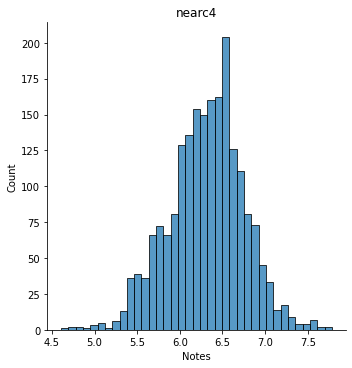

In [11]:
plt.figure(figsize=(14,10))

nearc4=card.loc[card['nearc4']==1]
ax = sns.displot(nearc4,x="lwage")

plt.title('nearc4')
plt.xlabel('Notes')
plt.ylabel('Count')
plt.show()

<Figure size 1008x720 with 0 Axes>

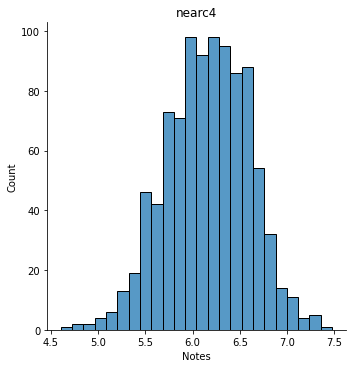

In [12]:
plt.figure(figsize=(14,10))

nearc4=card.loc[card['nearc4']==0]
ax = sns.displot(nearc4,x="lwage")

plt.title('nearc4')
plt.xlabel('Notes')
plt.ylabel('Count')
plt.show()

**interpretacion**

En estos histogramas se presenat una variacion pues los puntos de mayor alcance en cada uno de ellos inician en puntos diferentes, mientras que el primero es alrededor del 5.9 en el segundo es a partir del 5.7. Asmismo, la acumulacion del primero tieen un mayor alcance pues llega hasta el 200, mientras que el segundo solo hasta el 100. Ello puede indicar que sí puede existir una diferencia en el caso de los estudiantes que viven cerca o lejos de la universidad, en donde los primeros perciben más ingresos debido a las diferencias en favor del grupo de tratamiento con respecto a los años de estudio en una universidad.

#### REGRESIONES

Ahora van a replicar las regresiones que hicimos en clase pero el instrumento Z ya no será nearc4 sino nearc2 .

Corran una regresion lineal del tipo "lwage ~ educ + exper + black + south + married + smsa", y expliquen los resultados que encuentran.



In [13]:
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = card).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.97e-232
Time:                        18:26:16   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**interpretacion**

el modelo presenta un f statistic fuerte ademas logra explicar en un 30.4%la variabilidad d ela variable dependiente. Asimismo podemos aproximar que por cada a;o de escolaridad aumenta el nivel de ingreso de las personas en 7.1%, por cada año de experiencia laboral los ingreso aumentan en un casi 3% y si viven en SMSA los ingreoss aumentan en 17%. Tambien podemos observar como los ingresos varian negativamente, disminuyendo, si es que la persona es afroamericana en 16%, si vive en el sur se ve afectado en 13% y si esta casado o casada disminuira en 3%. Todo ello ha sido significativo pues tienen un pvalue menor a 0.05

Corran una regresion de tipo IV(usando el paquete IV2SLS) donde van a instrumentalizar la variable educ con nearc2 .
La regressión debería tener una forma de este tipo "lwage ~ 1 + exper + black + south + married + smsa + [educ ~ nearc4 ]".
Compare los resultados encontrados en la regresión de arriba. Cambió el coeficiente relacionado a educ , por qué?

In [14]:
iv_reg = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc4]", card).fit()
iv_reg.summary

C:\Users\cam17\anaconda3\lib\site-packages\linearmodels\iv\model.py:543: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.


<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                      0.2513
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2498
No. Observations:                3003   F-statistic:                    892.71
Date:                Sun, Nov 13 2022   P-value (F-stat)                0.0000
Time:                        18:26:22   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      4.1625     0.8349     4.9857     0.0000      2.5262      5.7988
black         -0.1157     0.0496    -2.3343     0.0196     -0.2128     -0.0186
exper          0.0556     0.0199     2.7980     0.0051      0.0166      0.0945
married       -0.0320     0.0051    -6.3037     0.0000     -0.0419     -0.0220
smsa           0.1477     0.0303     4.8721     0.0000      0.0883      0.2071
south         -0.1132     0.0229    -4.9314     0.0000     -0.1581     -0.0682
educ           0.1242     0.0492     2.5258     0.0115      0.0278      0.2205
==============================================================================

Endogenous: educ
Instruments: nearc4
Robust Covariance (Heteroskedastic)
Debiased: False
"""

**interpretacion**

En este modleo hay un f-statistic  mayor a 15 que no reporta un instrumento debil ademas de que las variables aqui presentadas ya no son significativas como en el modleo anterior al tener un pvalue mayor de 0.05. En general hay un retorno a la educación mucho mayor que el que habíamos encontrado utilizando OLS. El rendimiento de la educación asociado con esta estimación 2SLS es 0,124, por tanto, por cada año adicional de educación, los ingresos aumentan un 12,4 %. 